<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [ ]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!git clone https://github.com/kohi2112002/WineQuality.git

Cloning into 'WineQuality'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [ ]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)

In [ ]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


In [ ]:
red_df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
# spilt data (red and white wine datasets) into training and test sets. 
# Repeat the process 3 times, ensuring each repeat is different 

r_train_1, r_test_1 = train_test_split(red_df, test_size = 0.1, random_state = 42)
r_train_2, r_test_2 = train_test_split(red_df, test_size = 0.1, random_state = 41)
r_train_3, r_test_3 = train_test_split(red_df, test_size = 0.1, random_state = 40)
w_train_1, w_test_1 = train_test_split(white_df, test_size = 0.1, random_state = 42)
w_train_2, w_test_2 = train_test_split(white_df, test_size = 0.1, random_state = 41)
w_train_3, w_test_3 = train_test_split(white_df, test_size = 0.1, random_state = 40)

# **Second - Task - Khoi**

In [ ]:
# Test 1 # Copy Data
k_r_tr_1 = r_train_1.copy()
k_r_ts_1 = r_test_1.copy()
k_w_tr_1 = w_train_1.copy()
k_w_ts_1 = w_test_1.copy()
k_r_tr_2 = r_train_2.copy()
k_r_ts_2 = r_test_2.copy()
k_w_tr_2 = w_train_2.copy()
k_w_ts_2 = w_test_2.copy()
k_r_tr_3 = r_train_3.copy()
k_r_ts_3 = r_test_3.copy()
k_w_tr_3 = w_train_3.copy()
k_w_ts_3 = w_test_3.copy()


In [ ]:
# export to csv file
k_r_tr_1.to_csv('/content/sample_data/k_r_tr_1.csv')
k_r_ts_1.to_csv('/content/sample_data/k_r_ts_1.csv')
k_w_tr_1.to_csv('/content/sample_data/k_w_tr_1.csv')
k_w_ts_1.to_csv('/content/sample_data/k_w_ts_1.csv')
k_r_tr_2.to_csv('/content/sample_data/k_r_tr_2.csv')
k_r_ts_2.to_csv('/content/sample_data/k_r_ts_2.csv')
k_w_tr_2.to_csv('/content/sample_data/k_w_tr_2.csv')
k_w_ts_2.to_csv('/content/sample_data/k_w_ts_2.csv')
k_r_tr_3.to_csv('/content/sample_data/k_r_tr_3.csv')
k_r_ts_3.to_csv('/content/sample_data/k_r_tr_3.csv')
k_w_tr_3.to_csv('/content/sample_data/k_w_tr_3.csv')
k_w_ts_3.to_csv('/content/sample_data/k_w_ts_3.csv')

In [ ]:
#Scaling Data
scaler = MinMaxScaler()
scaler.fit(k_r_tr_1)
scaled_r_tr_1 = scaler.transform(k_r_tr_1)
scaler.fit(k_r_ts_1)
scaled_r_ts_1 = scaler.transform(k_r_ts_1)
scaler.fit(k_w_tr_1)
scaled_w_tr_1 = scaler.transform(k_w_tr_1)
scaler.fit(k_w_ts_1)
scaled_w_ts_1 = scaler.transform(k_w_ts_1)

scaler.fit(k_r_tr_2)
scaled_r_tr_2 = scaler.transform(k_r_tr_2)
scaler.fit(k_r_ts_2)
scaled_r_ts_2 = scaler.transform(k_r_ts_2)
scaler.fit(k_w_tr_2)
scaled_w_tr_2 = scaler.transform(k_w_tr_2)
scaler.fit(k_w_ts_2)
scaled_w_ts_2 = scaler.transform(k_w_ts_2)

scaler.fit(k_r_tr_3)
scaled_r_tr_3 = scaler.transform(k_r_tr_3)
scaler.fit(k_r_ts_3)
scaled_r_ts_3 = scaler.transform(k_r_ts_3)
scaler.fit(k_w_tr_2)
scaled_w_tr_3 = scaler.transform(k_w_tr_3)
scaler.fit(k_w_ts_2)
scaled_w_ts_3 = scaler.transform(k_w_ts_3)

Train_List = [scaled_r_tr_1, scaled_r_tr_2, scaled_r_tr_3, scaled_w_tr_1, scaled_w_tr_2, scaled_w_tr_3]
Test_List = [scaled_r_ts_1, scaled_r_ts_2, scaled_r_ts_3, scaled_w_ts_1, scaled_w_ts_2, scaled_w_ts_3]
str_tr_lst = ['red_train_1', 'red_train_2', 'red_train_3', 'white_train_1', 'white_train_2', 'white_train_3']
str_ts_lst = ['red_test_1', 'red_test_2', 'red_test_3', 'white_test_1', 'white_test_2', 'white_test_3']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


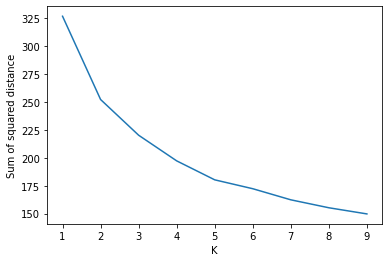

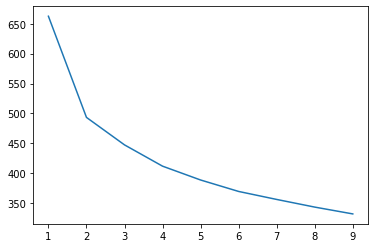

In [ ]:
#Choosing K value by Elbow Method
sse_1 = []
sse_2 = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(scaled_r_tr_1)
  sse_1.append(km.inertia_)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(scaled_w_tr_1)
  sse_2.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.figure(1)
sns.lineplot(k_rng, sse_1)
plt.figure(2)
sns.lineplot(k_rng, sse_2)

# K = 2,3 is suitable

**How can we pick value of K - the number of clusters**
- We create a method contaning a loop througn a set of test value of k and then calculate the inertia value. The inertia value is the sum of squared distances of samples to their closest cluster center.
- We visualize all inertia value of each K.
- As we can see the higher the value of k is, the smaller the inertia is. That means there exists sum cluster with only some data. That express that the data is poorly divided.
- That's the reason why 2 and 3 are the best number of cluster. 

In [ ]:
# Convert silhouette to percentage
def sil2per(sil_score):
  if(sil_score == 0):
    return 50
  elif(sil_score == 1):
    return 100
  elif(sil_score == -1):
    return 0
  elif(sil_score > 0):
    return int(100 - (1 - sil_score)*50)
  elif(sil_score < 0):
    return int((sil_score + 1)*50)

In [ ]:
# Training - Testing - K = 3

train_labels_lst_cls3 = []
test_labels_lst_cls3 = []
train_centroid_lst_cls3 = []
sil_score_lst_cls3 = []
acc_rate_lst_cls3 = []
for i in range(6):
  #Train
  km = KMeans(n_clusters = 3).fit(Train_List[i]) # Kmean
  train_labels_lst_cls3.append(km.labels_) #Get labels
  train_centroid_lst_cls3.append(km.cluster_centers_) #Get centroids
  #Test
  test = km.predict(Test_List[i]) #Get predicted labels
  test_labels_lst_cls3.append(test)
  sil_score = silhouette_score(Test_List[i], test) #Get silhouette score
  acc_rate = sil2per(sil_score) #Get accuracy rate
  sil_score_lst_cls3.append(sil_score) #Store sil score
  acc_rate_lst_cls3.append(acc_rate) #Store acc rate
  #Show
  print("The silhouette score of {0} test data: {1}".format(str_ts_lst[i], sil_score))
  print("The accuracy rate of {0} test data: {1}%".format(str_ts_lst[i], acc_rate))

The silhouette score of red_test_1 test data: 0.19623064978167795
The accuracy rate of red_test_1 test data: 59%
The silhouette score of red_test_2 test data: 0.1939915178273359
The accuracy rate of red_test_2 test data: 59%
The silhouette score of red_test_3 test data: 0.1729375215982301
The accuracy rate of red_test_3 test data: 58%
The silhouette score of white_test_1 test data: 0.13512296785317812
The accuracy rate of white_test_1 test data: 56%
The silhouette score of white_test_2 test data: 0.11960146797073704
The accuracy rate of white_test_2 test data: 55%
The silhouette score of white_test_3 test data: 0.11633193449458941
The accuracy rate of white_test_3 test data: 55%


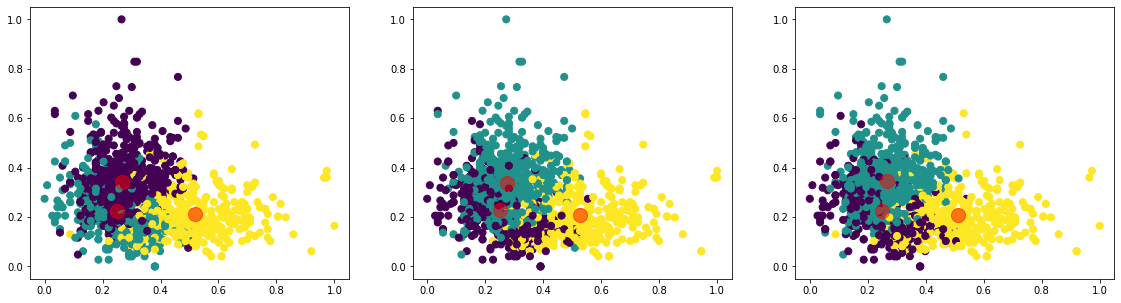

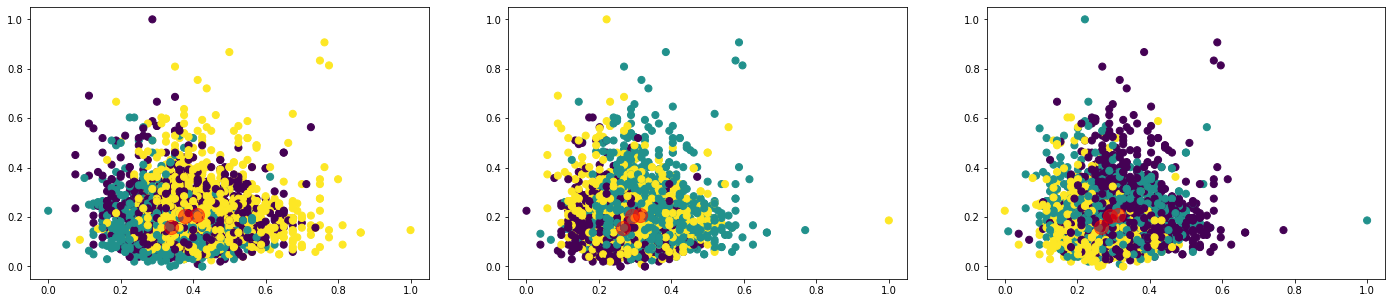

In [ ]:
plt.figure(figsize=(40,5))
for i in range(3):
  plt.subplot(1,6,i+1)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls3[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls3[i][:, 0], train_centroid_lst_cls3[i][:, 1], c='red', s=200, alpha=0.5);
plt.figure(figsize=(50,5))
for i in range(3,6):
  plt.subplot(1,6,i)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls3[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls3[i][:, 0], train_centroid_lst_cls3[i][:, 1], c='red', s=200, alpha=0.5);

In [ ]:
#Showing Center and Labels of K = 3 Cluster
for i in range(6):
  print("the {0} data has centroids \n{1} \n and labels{2}".format(str_tr_lst[i], train_centroid_lst_cls3[i], train_labels_lst_cls3[i]))
  print('\n')

the red_train_1 data has centroids 
[[0.26873934 0.34178177 0.16097087 0.10799308 0.12478727 0.22143541
  0.16844979 0.49626579 0.47472343 0.16244903 0.22314449 0.4443828 ]
 [0.24829254 0.225832   0.25543544 0.09619894 0.09911915 0.22566933
  0.11614088 0.34267748 0.50779126 0.21006635 0.50811581 0.66366366]
 [0.52023905 0.21266679 0.50077922 0.13817826 0.15494656 0.17984269
  0.12273875 0.61315865 0.34733613 0.24763979 0.30735931 0.56051948]] 
 and labels[1 0 2 ... 0 1 1]


the red_train_2 data has centroids 
[[0.25083768 0.22920374 0.25311178 0.10120846 0.09835123 0.2256287
  0.11741911 0.34139195 0.51162072 0.20958084 0.59961696 0.66163142]
 [0.27610212 0.33958998 0.16145205 0.10767029 0.12551513 0.21995948
  0.16816884 0.49624746 0.47336857 0.16210319 0.2547986  0.44438356]
 [0.52830688 0.20853265 0.49415344 0.13130572 0.14984851 0.17683881
  0.11911306 0.61040797 0.35003958 0.2444793  0.35070232 0.56666667]] 
 and labels[0 0 1 ... 1 0 1]


the red_train_3 data has centroids 
[[0.2

In [ ]:
# Training - Testing - K = 2

train_labels_lst_cls2 = []
test_labels_lst_cls2 = []
train_centroid_lst_cls2 = []
sil_score_lst_cls2 = []
acc_rate_lst_cls2 = []
for i in range(6):
  #Train
  km = KMeans(n_clusters = 2, algorithm="elkan").fit(Train_List[i]) # Kmean
  train_labels_lst_cls2.append(km.labels_) #Get labels
  train_centroid_lst_cls2.append(km.cluster_centers_) #Get centroids
  #Test
  test = km.predict(Test_List[i]) #Get predicted labels
  test_labels_lst_cls2.append(test)
  sil_score = silhouette_score(Test_List[i], test) #Get silhouette score
  acc_rate = sil2per(sil_score) #Get accuracy rate
  sil_score_lst_cls2.append(sil_score) #Store sil score
  acc_rate_lst_cls2.append(acc_rate) #Store acc rate
  #Show
  print("The silhouette score of {0} test data: {1}".format(str_ts_lst[i], sil_score))
  print("The accuracy rate of {0} test data: {1}%".format(str_ts_lst[i], acc_rate))

The silhouette score of red_test_1 test data: 0.22676914839793136
The accuracy rate of red_test_1 test data: 61%
The silhouette score of red_test_2 test data: 0.25001799222827753
The accuracy rate of red_test_2 test data: 62%
The silhouette score of red_test_3 test data: 0.26012707363398657
The accuracy rate of red_test_3 test data: 63%
The silhouette score of white_test_1 test data: 0.20148349427364684
The accuracy rate of white_test_1 test data: 60%
The silhouette score of white_test_2 test data: 0.2101185891410407
The accuracy rate of white_test_2 test data: 60%
The silhouette score of white_test_3 test data: 0.2255714700037779
The accuracy rate of white_test_3 test data: 61%


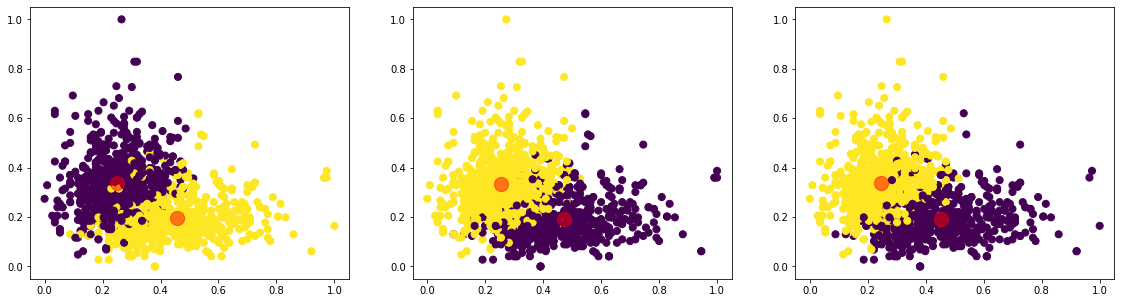

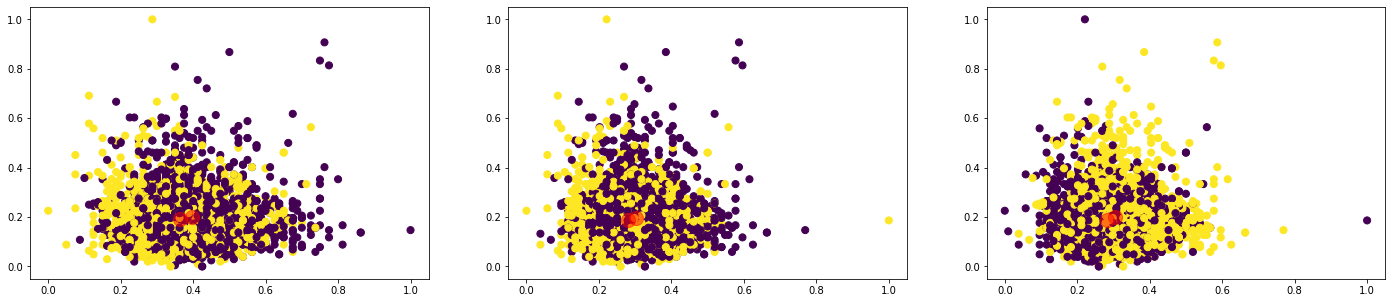

In [ ]:
plt.figure(figsize=(40,5))
for i in range(3):
  plt.subplot(1,6,i+1)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls2[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls2[i][:, 0], train_centroid_lst_cls2[i][:, 1], c='red', s=200, alpha=0.5);
plt.figure(figsize=(50,5))
for i in range(3,6):
  plt.subplot(1,6,i)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls2[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls2[i][:, 0], train_centroid_lst_cls2[i][:, 1], c='red', s=200, alpha=0.5);

In [ ]:
#Showing Center and Labels of K = 2 Cluster
for i in range(6):
  print("the {0} data has centroids \n{1} \n and labels{2}".format(str_tr_lst[i], train_centroid_lst_cls2[i], train_labels_lst_cls2[i]))
  print('\n')

the red_train_1 data has centroids 
[[0.24900824 0.33613998 0.14588506 0.10456227 0.11842151 0.22554638
  0.15762967 0.45924773 0.49612635 0.1668938  0.28111111 0.48206897]
 [0.45711308 0.19518742 0.46924429 0.12676048 0.13990511 0.18948489
  0.12345135 0.54207345 0.37515741 0.24116267 0.35827137 0.59367311]] 
 and labels[1 0 1 ... 0 1 0]


the red_train_2 data has centroids 
[[0.47023569 0.19160959 0.46740741 0.12379503 0.13674334 0.18521127
  0.11783144 0.54139474 0.37559055 0.24030827 0.4191358  0.60407407]
 [0.2562342  0.33272891 0.15131257 0.10554345 0.11900071 0.22478811
  0.15909314 0.46011395 0.49432878 0.16724504 0.32336856 0.47986652]] 
 and labels[0 1 1 ... 1 0 1]


the red_train_3 data has centroids 
[[0.45174516 0.19252922 0.46531469 0.1252814  0.14013157 0.20117942
  0.12374286 0.53887614 0.3798249  0.2408714  0.35695715 0.59300699]
 [0.24724663 0.33806544 0.14351788 0.10501888 0.11668621 0.23763535
  0.15881905 0.45806171 0.49812459 0.16702926 0.28147162 0.48143022]] 
 a

# **Third - `Task` - Ha**


1.   Data Preprocessing 
- Import Dataset
- Check missing data (skip this step because no nan values)
- Encoding data
- Split data into train set and test set
- Scalling
2.   Regression
- Check assumptions: linearity, homoscedasity, normality, independence, lack of multicollinearity
- Simple Regression
- Logistic Regression
- For every repeat (using different training sets), the regression model should be trained from scratch. 
- List the obtained regression equations in different repeats.
3. Test the Accuracy
 - 4 confusion matrices: accuracy, true positive, false positive, false negative, precision
 - Mean values of all indices -> model performance of regression

In [ ]:
# data prep, spilt to predictor and response variable
X_r = red_df.iloc[:, :-1]
Y_r = red_df.iloc[:, -1:]
X_w = white_df.iloc[:, :-1]
Y_w = white_df.iloc[:, -1:]

## Variables in the dataset ##




1. Input variables (based on physicochemical tests):
 Input variables (based on physicochemical tests):
- fixed acidity (tartaric acid - g / dm^3): most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity (acetic acid - g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid (g / dm^3): found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- residual sugar (g / dm^3): the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides (sodium chloride - g / dm^3): the amount of salt in the wine
- free sulfur dioxide (mg / dm^3): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide (mg / dm^3):  amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density (g / cm^3): the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates (potassium sulphate - g / dm3): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol (% by volume): the percent alcohol content of the wine
2. Output variable (based on sensory data): 
- quality (score between 0 and 10): ordinal categorical data

Note: we make do both options - numerical and ordinal dependent variable



In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statistics as st


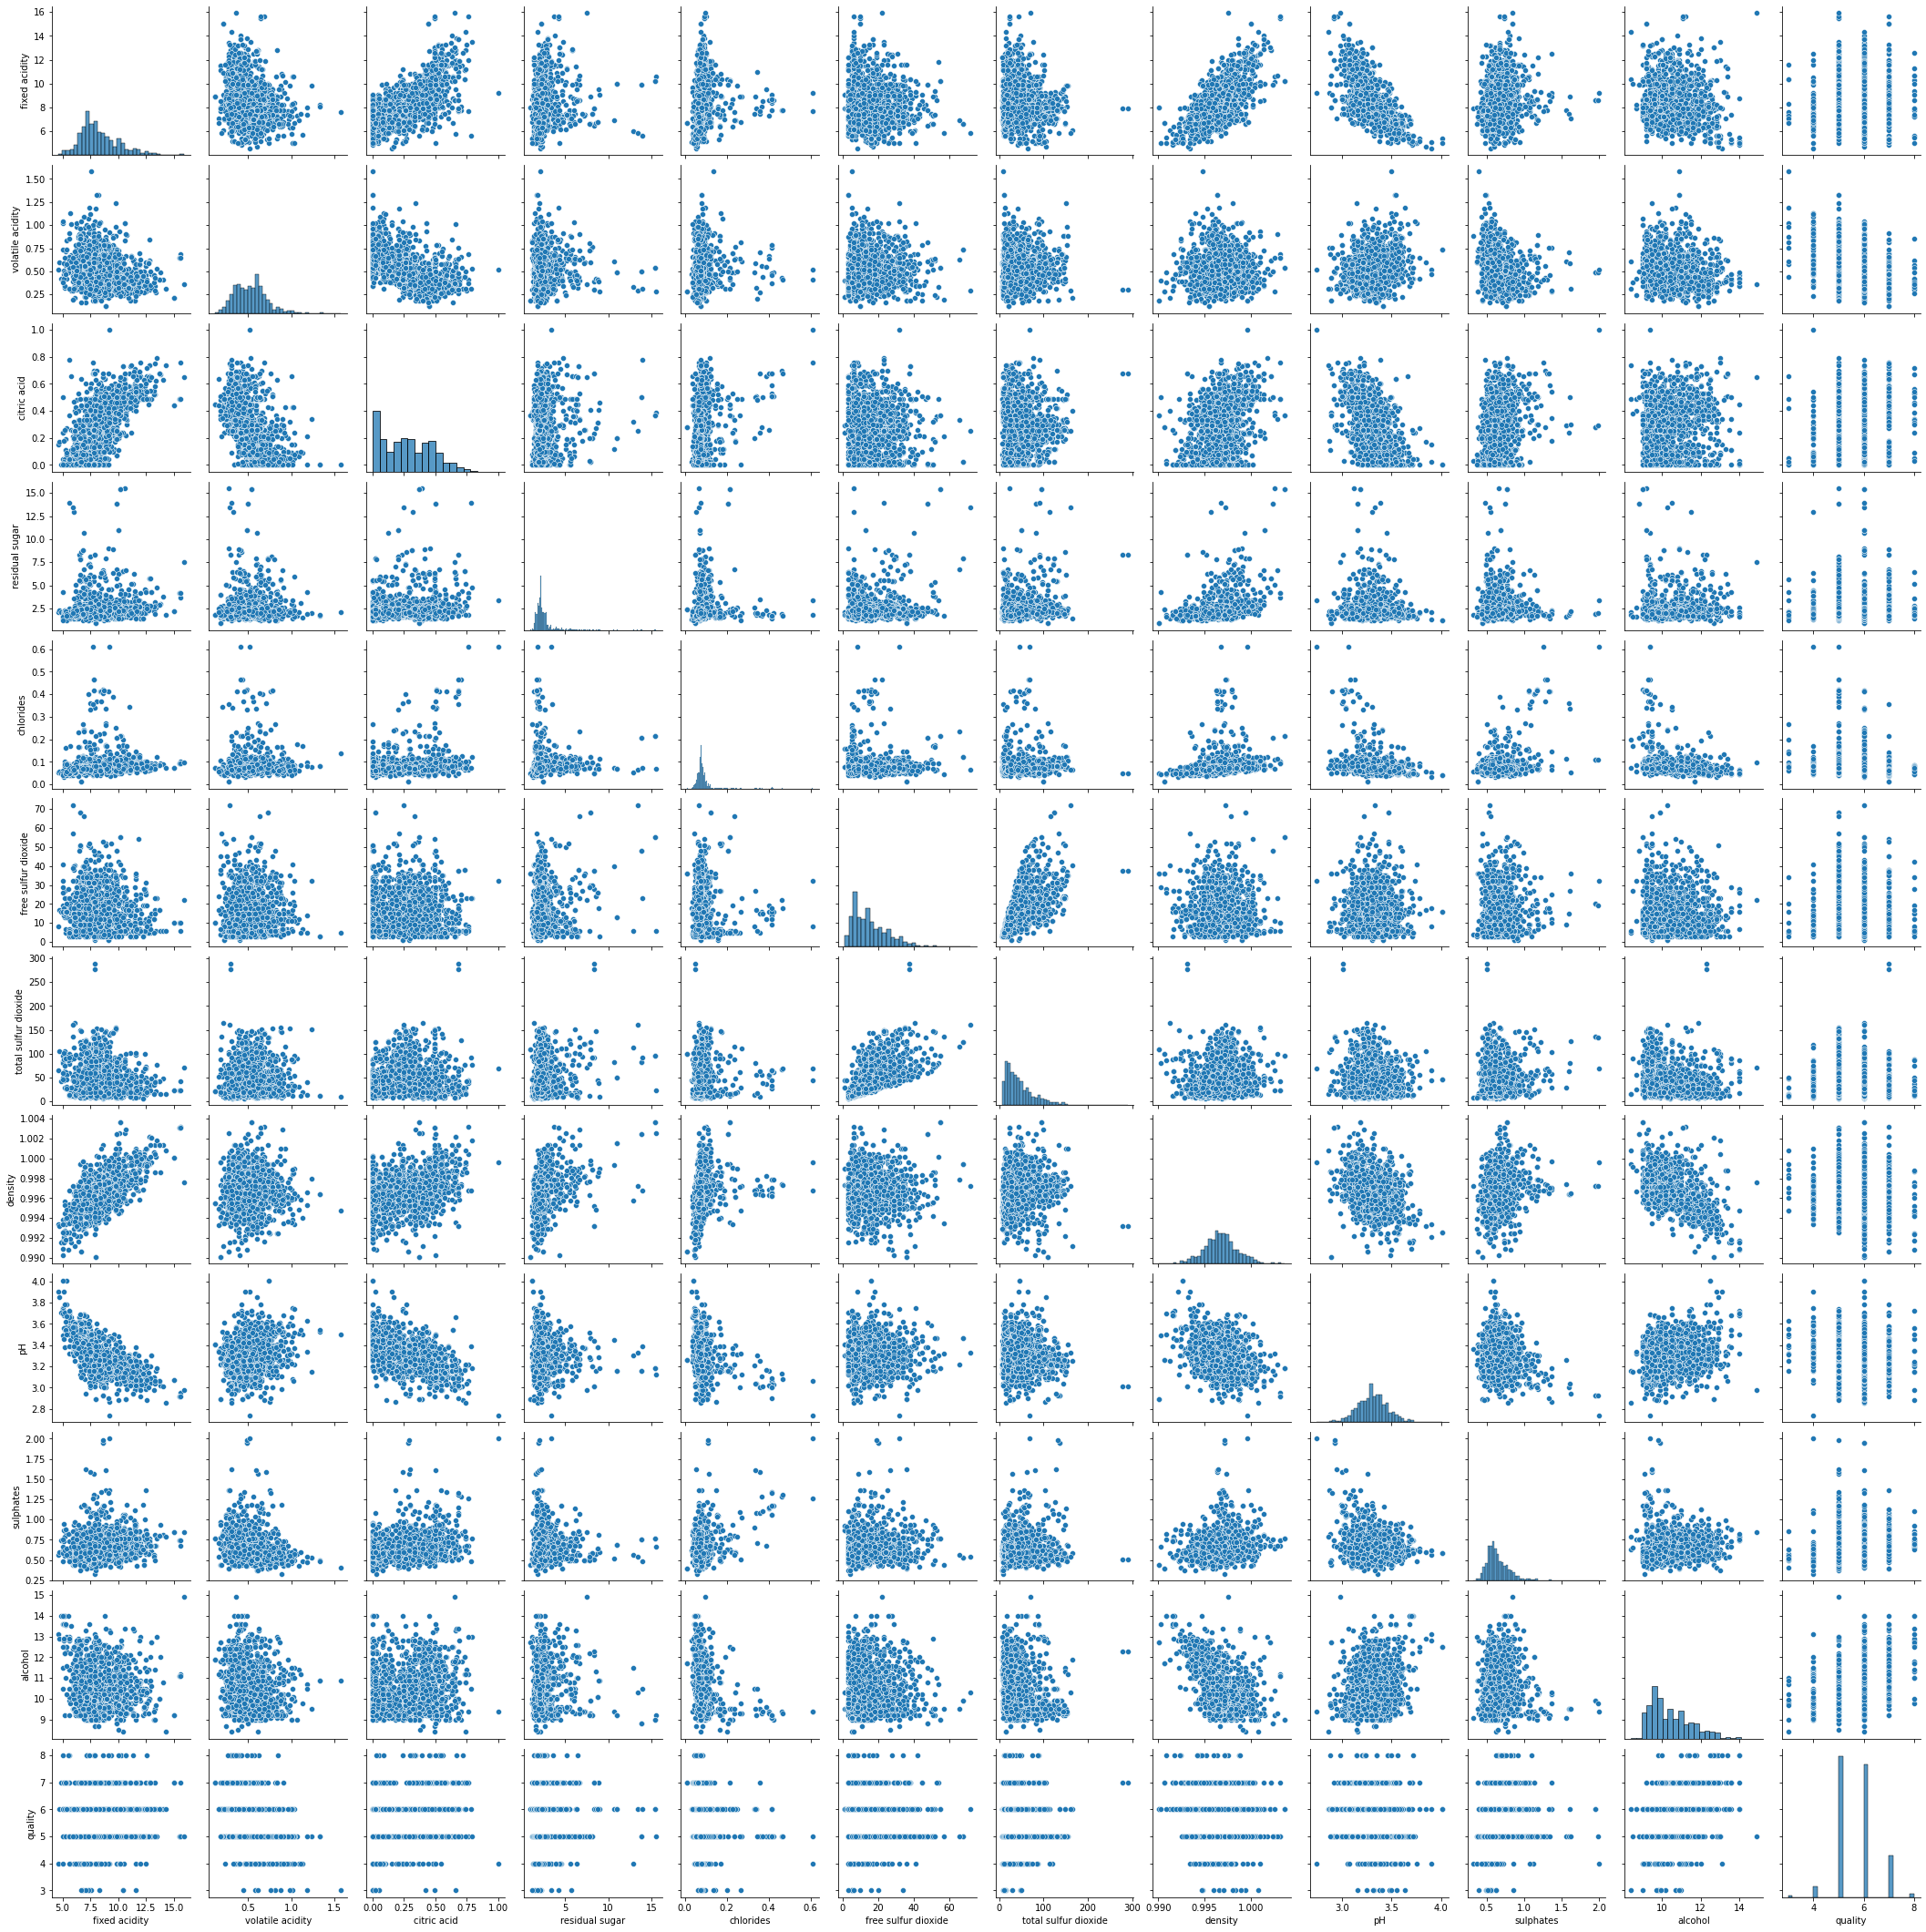

In [ ]:
# RED WINE: check correlation between predictors, predictor vs response, and distribution shape of data
p_r = sns.pairplot(red_df)

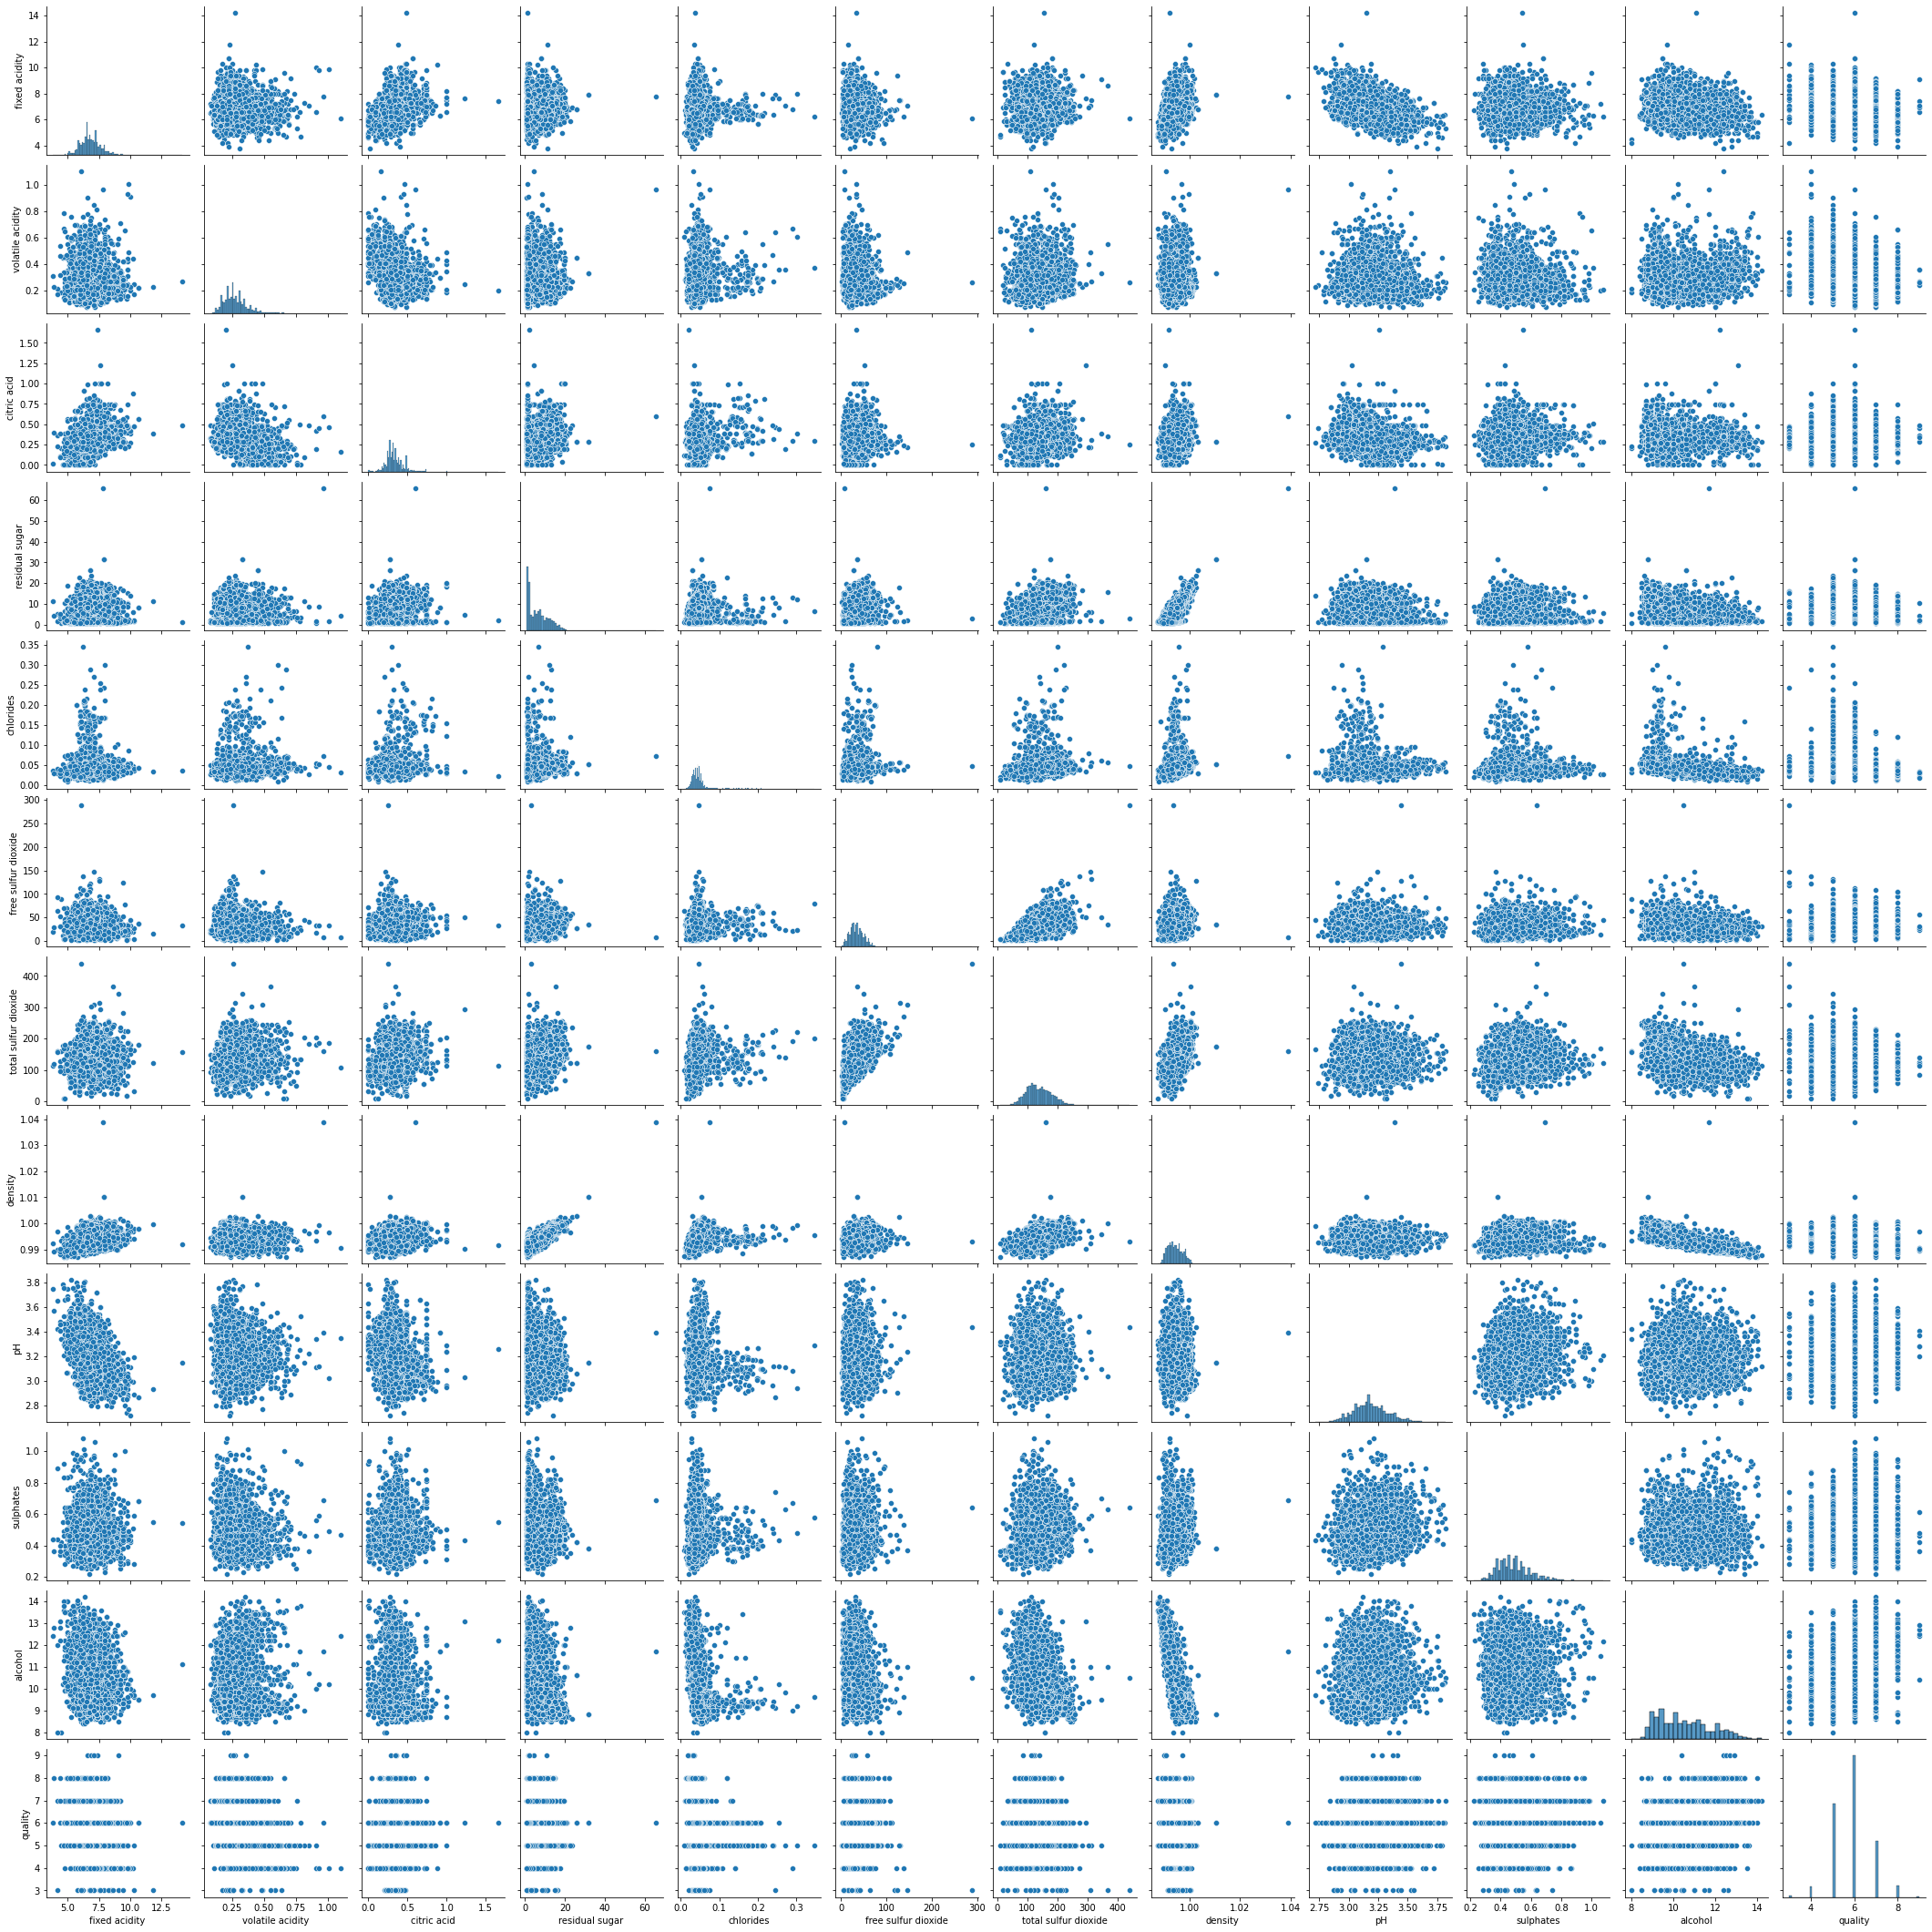

In [ ]:
# WHITE WINE: check correlation between predictors, predictor vs response, and distribution shape of data
p_w = sns.pairplot(white_df)

Comments:

In both Red and Wine datasets:

High correlation between predictors:


*   Fixed Acidity - voltile acidity (-),citric Acidity (+), density (+), pH (-)
*   Alcohol - density (-)

High correlation between response and predictors
*   Response variable: fixed, voltile, citric acidity, alcohol, density

Skip encoding data part for response variable: quality is rating so it should be ordinal categorical data. But we can also recognize it a numerical data for ease of using model

Skip Scalling because none of the predictors has very skewed distribution. We don't need a general scalling for all the predictors because the betas in the regression equation can do the work



## Repeat 1 ##

Regression method: Wrapper method. Based on the R-squared and the p-value for each predictor in the regression, drop insignificant predictors and keep significant ones. The goal is to obtain a regression equation with the minimum number of predictors while still make good estimation.

*   Red Wine: backward selection (from a full equation, drop predictors)
*   White wine: forward selection (from a 1 predictor function, add one more, etc.)



### Red Wine data ###

In [ ]:
# spilt red wine data into test and training set
X_r_tr1, X_r_t1, Y_r_tr1, Y_r_t1 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 42)

# export to csv
X_r_tr1.to_csv('/content/sample_data/X_r_tr1.csv')
X_r_t1.to_csv('/content/sample_data/X_r_t1.csv')
Y_r_tr1.to_csv('/content/sample_data/Y_r_tr1.csv')
Y_r_t1.to_csv('/content/sample_data/Y_r_t1.csv')


In [ ]:
print(Y_r_tr1) 

      quality
1125        7
1144        5
1058        7
629         5
1350        5
...       ...
1130        6
1294        6
860         5
1459        7
1126        6

[1439 rows x 1 columns]


Modeling 'Initial Fit': First, fit a full regression model to both red and wine training datasets

In [ ]:
# using sklearn to fit the model
reg_r = LinearRegression().fit(X_r_tr1, Y_r_tr1)
reg_r.score(X_r_tr1, Y_r_tr1)
reg_r.coef_
Y_r_hat1 = reg_r.predict(X_r_tr1)
Y_r_hat_t1 = reg_r.predict(X_r_t1)
print("R squared: {}".format(r2_score(y_true=Y_r_tr1,y_pred=Y_r_hat1)))


R squared: 0.35253679884746103


In [ ]:
#MSE & RMSE penalize large errors more than MAE 
mae = mean_absolute_error(Y_r_hat_t1,Y_r_t1)
rmse = math.sqrt(mean_squared_error(Y_r_hat_t1,Y_r_t1))
print('Root Mean Squared Error = ',rmse)
print('Mean Absolute Error = ',mae)
# MSE & RMSE are low because the model takes all variables

Root Mean Squared Error =  0.6194252830576056
Mean Absolute Error =  0.4893063112270573


In [ ]:
# using statsmodel package to provide description about predictors
X1 = X_r_tr1
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model1 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model1.predict(X1) # make the predictions by the model

# Print out the statistics
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     70.64
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.50e-126
Time:                        01:16:30   Log-Likelihood:                -1418.9
No. Observations:                1439   AIC:                             2862.
Df Residuals:                    1427   BIC:                             2925.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.1326     22.179      0.953      0.341     -22.374      64.639
fixed acidity            0.0226      0.027      0.823      0.411      -0.031       0.076
volatile acidity        -1.0421      0.127     -8.210      0.000      -1.291      -0.793
citric acid             -0.1040      0.155     -0.669      0.504      -0.409       0.201
residual sugar           0.0133      0.016      0.851      0.395      -0.017       0.044
chlorides               -1.7641      0.434     -4.061      0.000      -2.616      -0.912
free sulfur dioxide      0.0046      0.002      2.024      0.043       0.000       0.009
total sulfur dioxide    -0.0032      0.001     -4.239      0.000      -0.005      -0.002
density                -17.2396     22.642     -0.761      0.447     -61.654      27.175
pH                      -0.3427      0.202     -1.699      0.090      -0.738       0.053
sulphates                0.8764      0.120      7.328      0.000       0.642       1.111
alcohol                  0.2715      0.028      9.807      0.000       0.217       0.326
==============================================================================
Omnibus:                       24.776   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.099
Skew:                          -0.166   Prob(JB):                     8.79e-09
Kurtosis:                       3.713   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(X1)

      const  fixed acidity  volatile acidity  ...    pH  sulphates  alcohol
1125    1.0            8.8             0.240  ...  3.14       0.59     11.3
1144    1.0            7.3             0.320  ...  3.43       0.62     10.1
1058    1.0            9.9             0.530  ...  3.19       0.76     11.6
629     1.0            7.6             0.685  ...  3.21       0.61      9.3
1350    1.0            9.0             0.600  ...  3.34       0.57     10.0
...     ...            ...               ...  ...   ...        ...      ...
1130    1.0            9.1             0.600  ...  3.18       0.63     10.4
1294    1.0            8.2             0.635  ...  3.29       0.75     10.9
860     1.0            7.2             0.620  ...  3.51       0.54      9.5
1459    1.0            7.9             0.200  ...  3.32       0.80     11.9
1126    1.0            5.8             0.290  ...  3.39       0.54     13.5

[1439 rows x 12 columns]


In [ ]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_r_tr1.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_r_tr1.values, i) 
                          for i in range(len(X_r_tr1.columns))]
# print VIF
print(vif_data)

                 feature          VIF
0          fixed acidity    75.282755
1       volatile acidity    16.820459
2            citric acid     9.289782
3         residual sugar     4.580631
4              chlorides     6.394830
5    free sulfur dioxide     6.462324
6   total sulfur dioxide     6.512627
7                density  1462.896828
8                     pH  1060.262099
9              sulphates    21.026772
10               alcohol   124.133998


In [ ]:
X1 = X_r_tr1[['volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model2 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model2.predict(X1) # make the predictions by the model

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     93.17
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          1.33e-124
Time:                        01:16:30   Log-Likelihood:                -1429.8
No. Observations:                1439   AIC:                             2878.
Df Residuals:                    1430   BIC:                             2925.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1913      0.487      8.607      0.000       3.236       5.147
volatile acidity       -1.1410      0.121     -9.440      0.000      -1.378      -0.904
citric acid            -0.1634      0.129     -1.271      0.204      -0.416       0.089
residual sugar          0.0025      0.013      0.199      0.843      -0.022       0.027
free sulfur dioxide    -0.0021      0.002     -1.257      0.209      -0.005       0.001
chlorides              -1.6910      0.419     -4.039      0.000      -2.512      -0.870
pH                     -0.4366      0.141     -3.086      0.002      -0.714      -0.159
sulphates               0.8349      0.116      7.185      0.000       0.607       1.063
alcohol                 0.3032      0.018     16.866      0.000       0.268       0.338
==============================================================================
Omnibus:                       18.631   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.126
Skew:                          -0.125   Prob(JB):                     1.29e-06
Kurtosis:                       3.625   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'free sulfur dioxide', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model3 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model3.predict(X1) # make the predictions by the model

# Print out the statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     124.0
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.38e-126
Time:                        01:16:30   Log-Likelihood:                -1430.6
No. Observations:                1439   AIC:                             2875.
Df Residuals:                    1432   BIC:                             2912.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.8838      0.419      9.267      0.000       3.062       4.706
volatile acidity       -1.0673      0.106    -10.068      0.000      -1.275      -0.859
free sulfur dioxide    -0.0020      0.002     -1.188      0.235      -0.005       0.001
chlorides              -1.7699      0.413     -4.282      0.000      -2.581      -0.959
pH                     -0.3515      0.124     -2.839      0.005      -0.594      -0.109
sulphates               0.8221      0.116      7.112      0.000       0.595       1.049
alcohol                 0.2995      0.018     16.970      0.000       0.265       0.334
==============================================================================
Omnibus:                       18.601   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.940
Skew:                          -0.127   Prob(JB):                     1.41e-06
Kurtosis:                       3.621   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model4 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model4.predict(X1) # make the predictions by the model

# Print out the statistics
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          3.74e-127
Time:                        01:16:30   Log-Likelihood:                -1431.3
No. Observations:                1439   AIC:                             2875.
Df Residuals:                    1433   BIC:                             2906.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8812      0.419      9.259      0.000       3.059       4.703
volatile acidity    -1.0627      0.106    -10.030      0.000      -1.270      -0.855
chlorides           -1.7617      0.413     -4.262      0.000      -2.572      -0.951
pH                  -0.3665      0.123     -2.975      0.003      -0.608      -0.125
sulphates            0.8117      0.115      7.041      0.000       0.586       1.038
alcohol              0.3018      0.018     17.206      0.000       0.267       0.336
==============================================================================
Omnibus:                       17.871   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.165
Skew:                          -0.115   Prob(JB):                     2.08e-06
Kurtosis:                       3.620   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'chlorides', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model5 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model5.predict(X1) # make the predictions by the model

# Print out the statistics
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.10e-126
Time:                        01:16:30   Log-Likelihood:                -1435.8
No. Observations:                1439   AIC:                             2882.
Df Residuals:                    1434   BIC:                             2908.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7994      0.209     13.395      0.000       2.389       3.209
volatile acidity    -1.1481      0.102    -11.228      0.000      -1.349      -0.948
chlorides           -1.5233      0.407     -3.747      0.000      -2.321      -0.726
sulphates            0.8375      0.115      7.265      0.000       0.611       1.064
alcohol              0.2899      0.017     16.928      0.000       0.256       0.324
==============================================================================
Omnibus:                       19.212   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.263
Skew:                          -0.110   Prob(JB):                     4.42e-07
Kurtosis:                       3.663   Cond. No.                         251.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Repeat 1 - Regression Model 5 -> Red Wine

1.   const = 2.7994
2.   voltile acidity = -1.1481
3.  chlorides = -1.5233
4. sulphates = 0.8375
5. alcohol = 0.2899



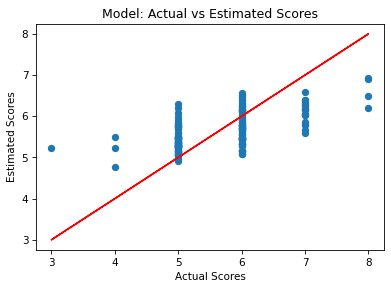

In [ ]:
# visualize true quality score and predicted quality score
X1_t = X_r_t1[['volatile acidity', 'chlorides', 'sulphates', 'alcohol']]
X1_t = sm.add_constant(X1_t) ## let's add an intercept (beta_0) to our model
Y1_t = model5.predict(X1_t)


plt.figure(dpi = 75)

plt.scatter(Y_r_t1, Y1_t)

plt.plot(Y_r_t1, Y_r_t1, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
# check RMSE of the model
print('rmse', mean_squared_error(Y_r_t1, Y1_t, squared=False))

rmse 0.6373562627873107


In [ ]:
# conver the quality 1-8 scale to 0 and 1 to make confusion matrix
cutoff = 5.5
Y1_r_pred = np.zeros_like(Y1_t)    # initialise a matrix full with zeros
Y1_r_pred[Y1_t > cutoff] = 1
print(Y1_r_pred)  

[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]


In [ ]:
print(Y_r_t1['quality'].to_numpy)

<bound method IndexOpsMixin.to_numpy of 803     6
124     5
350     6
682     5
1326    6
       ..
1522    5
297     5
405     6
1378    6
1049    6
Name: quality, Length: 160, dtype: int64>


In [ ]:
Y1_r_test = np.zeros_like(Y1_t)
Y1_r_test[Y_r_t1['quality'].to_numpy() > cutoff] = 1
print(Y1_r_test)

[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.]


In [ ]:
# confusion_matrix(y_test_classes, y_pred_classes)
cm = confusion_matrix(Y1_r_test, Y1_r_pred)
r1_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])

# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(r1_cm.iloc[0]['Predicted: Positive']/(r1_cm.iloc[0]['Predicted: Positive']+r1_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(r1_cm.iloc[1]['Predicted: Positive']/(r1_cm.iloc[1]['Predicted: Positive']+r1_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(r1_cm.iloc[0]['Predicted: Negative']/(r1_cm.iloc[0]['Predicted: Positive']+r1_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r1 = precision_score(Y1_r_test, Y1_r_pred)
print('precision = ', p_r1)# accuracy = % right estmation/ all estimation
a_r1 = accuracy_score(Y1_r_test, Y1_r_pred)
print('accuracy = ', a_r1)

TPR:  0.75
FPR:  0.25
FNR:  0.25
precision =  0.7857142857142857
accuracy =  0.75


### White Wine data ###

In [ ]:
X_w_tr1, X_w_t1, Y_w_tr1, Y_w_t1 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 42)
X_w_tr1.to_csv('/content/sample_data/X_w_tr1.csv')
X_w_t1.to_csv('/content/sample_data/X_w_t1.csv')
Y_w_tr1.to_csv('/content/sample_data/Y_w_tr1.csv')
Y_w_t1.to_csv('/content/sample_data/Y_w_t1.csv')

In [ ]:
print(Y_w_tr1)

      quality
1052        5
3606        5
1610        6
621         5
4750        5
...       ...
4426        6
466         6
3092        6
3772        6
860         8

[4408 rows x 1 columns]


For wine dataset, use the forward selection method

In [ ]:
# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X_w_tr1.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X_w_tr1.values, i) 
                          for i in range(len(X_w_tr1.columns))]
# print VIF
print(vif_data_w)

                 feature          VIF
0          fixed acidity    94.194274
1       volatile acidity     9.676181
2            citric acid    10.017023
3         residual sugar     3.830879
4              chlorides     6.503398
5    free sulfur dioxide     9.266701
6   total sulfur dioxide    25.501119
7                density  1067.380392
8                     pH   613.616743
9              sulphates    20.530285
10               alcohol   119.837215


In [ ]:
X1_w = X_w_tr1[['volatile acidity']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model1_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model1_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model1_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     173.2
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           7.78e-39
Time:                        01:16:31   Log-Likelihood:                -5628.4
No. Observations:                4408   AIC:                         1.126e+04
Df Residuals:                    4406   BIC:                         1.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3535      0.038    165.573      0.000       6.278       6.429
volatile acidity    -1.7030      0.129    -13.162      0.000      -1.957      -1.449
==============================================================================
Omnibus:                       74.498   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.065
Skew:                           0.280   Prob(JB):                     9.18e-19
Kurtosis:                       3.373   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model2_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model2_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model2_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.99e-44
Time:                        01:16:31   Log-Likelihood:                -5613.4
No. Observations:                4408   AIC:                         1.123e+04
Df Residuals:                    4405   BIC:                         1.125e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4315      0.041    157.621      0.000       6.351       6.511
volatile acidity    -1.6597      0.129    -12.846      0.000      -1.913      -1.406
residual sugar      -0.0140      0.003     -5.485      0.000      -0.019      -0.009
==============================================================================
Omnibus:                       67.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.365
Skew:                           0.250   Prob(JB):                     1.59e-17
Kurtosis:                       3.413   Cond. No.                         84.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'chlorides' ]]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model3_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model3_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model3_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.22e-77
Time:                        01:16:31   Log-Likelihood:                -5533.4
No. Observations:                4408   AIC:                         1.107e+04
Df Residuals:                    4404   BIC:                         1.110e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.7332      0.047    144.694      0.000       6.642       6.824
volatile acidity    -1.5692      0.127    -12.346      0.000      -1.818      -1.320
residual sugar      -0.0113      0.003     -4.489      0.000      -0.016      -0.006
chlorides           -7.5324      0.591    -12.756      0.000      -8.690      -6.375
==============================================================================
Omnibus:                       51.556   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.084
Skew:                           0.195   Prob(JB):                     3.30e-14
Kurtosis:                       3.431   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'alcohol', 'sulphates']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model4_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model4_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model4_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     387.7
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          1.76e-286
Time:                        01:16:31   Log-Likelihood:                -5048.3
No. Observations:                4408   AIC:                         1.011e+04
Df Residuals:                    4403   BIC:                         1.014e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1038      0.132     15.951      0.000       1.845       2.362
volatile acidity    -2.0991      0.114    -18.337      0.000      -2.324      -1.875
residual sugar       0.0280      0.003     11.031      0.000       0.023       0.033
alcohol              0.3763      0.011     35.706      0.000       0.356       0.397
sulphates            0.4570      0.101      4.538      0.000       0.260       0.655
==============================================================================
Omnibus:                       83.956   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.686
Skew:                           0.061   Prob(JB):                     1.42e-37
Kurtosis:                       3.953   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model5_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model5_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model5_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     318.4
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          9.42e-292
Time:                        01:16:31   Log-Likelihood:                -5033.1
No. Observations:                4408   AIC:                         1.008e+04
Df Residuals:                    4402   BIC:                         1.012e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9085      0.136     14.020      0.000       1.642       2.175
volatile acidity       -2.0339      0.115    -17.733      0.000      -2.259      -1.809
residual sugar          0.0248      0.003      9.549      0.000       0.020       0.030
free sulfur dioxide     0.0039      0.001      5.525      0.000       0.003       0.005
sulphates               0.4209      0.101      4.183      0.000       0.224       0.618
alcohol                 0.3835      0.011     36.234      0.000       0.363       0.404
==============================================================================
Omnibus:                       96.108   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.530
Skew:                           0.058   Prob(JB):                     8.62e-46
Kurtosis:                       4.057   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

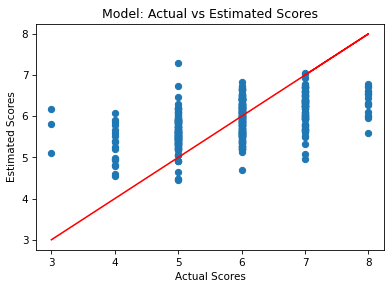

In [ ]:
X1_w_t = X_w_t1[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol']]
X1_w_t = sm.add_constant(X1_w_t) ## let's add an intercept (beta_0) to our model
Y1_w_t = model5_w.predict(X1_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t1, Y1_w_t)

plt.plot(Y_w_t1, Y_w_t1, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

Repeat 1 - Wine dataset -model 5 - forward selection
1. const = 1.9085
2. residual sugar = 0.0248
3. free sulfur dioxide = 0.0039
4. sulphates = 0.4209
5. alcohol = 0.3835

In [ ]:
print('rmse', mean_squared_error(Y_w_t1, Y1_w_t, squared=False))

rmse 0.7609272381127572


In [ ]:
cutoff = 5.5
Y1_w_pred = np.zeros_like(Y1_w_t)    # initialise a matrix full with zeros
Y1_w_pred[Y1_w_t > cutoff] = 1

Y1_w_test = np.zeros_like(Y1_w_t)
Y1_w_test[Y_w_t1['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y1_w_test, Y1_w_pred)
w1_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])

# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w1_cm.iloc[0]['Predicted: Positive']/(w1_cm.iloc[0]['Predicted: Positive']+w1_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w1_cm.iloc[1]['Predicted: Positive']/(w1_cm.iloc[1]['Predicted: Positive']+w1_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w1_cm.iloc[0]['Predicted: Negative']/(w1_cm.iloc[0]['Predicted: Positive']+w1_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w1 = precision_score(Y1_w_test, Y1_w_pred)
print('precision = ', p_w1)
# accuracy = % right estmation/ all estimation
a_w1 = accuracy_score(Y1_w_test, Y1_w_pred)
print('accuracy = ', a_w1)

TPR:  0.42424
FPR:  0.10154
FNR:  0.57576
precision =  0.7545219638242894
accuracy =  0.7387755102040816


## Repeat 2 ##



*   Regression Selection Method: Filter method
*   Based on Pearson correlation statistics, choose the best k variables for the model. In this model, we want to get around 4 or 5 predictors because the first repeat is reduced to around this number



### Red Wine Data ###

In [ ]:
X_r_tr2, X_r_t2, Y_r_tr2, Y_r_t2 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 30)
X_r_tr2.to_csv('/content/sample_data/X_r_tr2.csv')
X_r_t2.to_csv('/content/sample_data/X_r_t2.csv')
Y_r_tr2.to_csv('/content/sample_data/Y_r_tr2.csv')
Y_r_t2.to_csv('/content/sample_data/Y_r_t2.csv')

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X2_r_selected = fs.fit_transform(X_r_tr2, Y_r_tr2)
print(X2_r_selected[:5])


[[4.80e-01 2.00e-02 1.11e+02 5.30e-01 9.70e+00]
 [4.40e-01 0.00e+00 3.80e+01 5.80e-01 1.14e+01]
 [5.60e-01 2.40e-01 5.80e+01 5.60e-01 1.01e+01]
 [5.00e-01 3.30e-01 1.43e+02 5.50e-01 9.50e+00]
 [4.20e-01 3.20e-01 2.50e+01 4.40e-01 1.04e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_r_tr2.head(5)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
1389            6.7              0.48         0.02  ...  3.10       0.53      9.7
1045            6.9              0.44         0.00  ...  3.32       0.58     11.4
788            10.0              0.56         0.24  ...  3.18       0.56     10.1
188             7.9              0.50         0.33  ...  3.20       0.55      9.5
862             7.5              0.42         0.32  ...  3.24       0.44     10.4

[5 rows x 11 columns]

In [ ]:
X2 = X_r_tr2[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X2 = sm.add_constant(X2) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r2 = sm.OLS(Y_r_tr2, X2).fit()
predictions = model_r2.predict(X2) # make the predictions by the model

# Print out the statistics
model_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          3.14e-127
Time:                        01:16:35   Log-Likelihood:                -1432.9
No. Observations:                1439   AIC:                             2878.
Df Residuals:                    1433   BIC:                             2909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7814      0.216     12.866      0.000       2.357       3.205
volatile acidity        -1.1404      0.120     -9.528      0.000      -1.375      -0.906
citric acid              0.0236      0.108      0.218      0.827      -0.189       0.236
total sulfur dioxide    -0.0024      0.001     -4.348      0.000      -0.003      -0.001
sulphates                0.6866      0.107      6.436      0.000       0.477       0.896
alcohol                  0.2989      0.017     17.791      0.000       0.266       0.332
==============================================================================
Omnibus:                       25.197   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.350
Skew:                          -0.142   Prob(JB):                     1.73e-09
Kurtosis:                       3.769   Cond. No.                         769.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

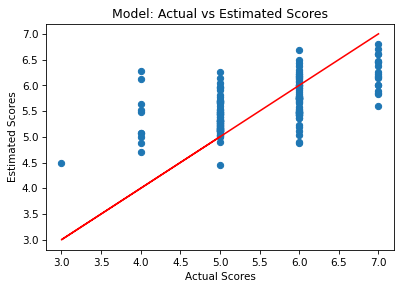

In [ ]:
X2_t = X_r_t2[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X2_t = sm.add_constant(X2_t) ## let's add an intercept (beta_0) to our model
Y2_t = model_r2.predict(X2_t)


plt.figure(dpi = 75)

plt.scatter(Y_r_t2, Y2_t)

plt.plot(Y_r_t2, Y_r_t2, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()


In [ ]:
print('rmse', mean_squared_error(Y_r_t2, Y2_t, squared=False))

rmse 0.647110848405316


In [ ]:
cutoff = 5.5
Y2_r_pred = np.zeros_like(Y2_t)    # initialise a matrix full with zeros
Y2_r_pred[Y2_t > cutoff] = 1

Y2_r_test = np.zeros_like(Y2_t)
Y2_r_test[Y_r_t2['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y2_r_test, Y2_r_pred)
print(cm)
# tp, tn, fp, fn

[[54 25]
 [19 62]]


In [ ]:
cm = confusion_matrix(Y2_r_test, Y2_r_pred)
r2_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
transfer
# tp, tn, fp, fn

Predicted: Positive  Predicted: Negative
Actual: Positive                   71                   86
Actual: Negative                   33                  300

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(transfer.iloc[0]['Predicted: Positive']/(transfer.iloc[0]['Predicted: Positive']+transfer.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(transfer.iloc[1]['Predicted: Positive']/(transfer.iloc[1]['Predicted: Positive']+transfer.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(transfer.iloc[0]['Predicted: Negative']/(transfer.iloc[0]['Predicted: Positive']+transfer.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r2 = precision_score(Y2_r_test, Y2_r_pred)
print('precision = ', p_r2 )# accuracy = % right estmation/ all estimation
a_r2 = accuracy_score(Y2_r_test, Y2_r_pred)
print('accuracy = ', a_r2)

TPR:  0.45223
FPR:  0.0991
FNR:  0.54777
precision =  0.7126436781609196
accuracy =  0.725


### White Wine Data ###

In [ ]:
X_w_tr2, X_w_t2, Y_w_tr2, Y_w_t2 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 30)
X_w_tr2.to_csv('/content/sample_data/X_w_tr2.csv')
X_w_t2.to_csv('/content/sample_data/X_w_t2.csv')
Y_w_tr2.to_csv('/content/sample_data/Y_w_tr2.csv')
Y_w_t2.to_csv('/content/sample_data/Y_w_t2.csv')

In [ ]:
# define feature selection
fs_w = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X2_w_selected = fs_w.fit_transform(X_w_tr2, Y_w_tr2)
print(X2_w_selected[:5])

[[3.1000e-01 4.2000e-02 1.6200e+02 9.9179e-01 1.0800e+01]
 [2.3000e-01 5.2000e-02 1.1800e+02 9.9380e-01 1.0400e+01]
 [2.3000e-01 2.5000e-02 1.2100e+02 9.9250e-01 1.1300e+01]
 [2.7000e-01 3.6000e-02 1.6400e+02 9.9390e-01 1.1000e+01]
 [1.3000e-01 2.3000e-02 1.0400e+02 9.9112e-01 1.1800e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_w_tr2.head(5)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
4429            6.1              0.31         0.34  ...  3.27       0.47     10.8
4233            6.3              0.23         0.33  ...  3.23       0.46     10.4
2695            5.7              0.23         0.28  ...  3.28       0.38     11.3
220             7.5              0.27         0.36  ...  3.03       0.33     11.0
2638            7.5              0.13         0.38  ...  3.28       0.53     11.8

[5 rows x 11 columns]

In [ ]:
X2_w = X_w_tr2[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X2_w = sm.add_constant(X2_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w2 = sm.OLS(Y_w_tr2, X2_w).fit()
predictions = model_w2.predict(X2_w) # make the predictions by the model

# Print out the statistics
model_w2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     284.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.17e-264
Time:                        01:16:36   Log-Likelihood:                -5094.1
No. Observations:                4408   AIC:                         1.020e+04
Df Residuals:                    4402   BIC:                         1.024e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -31.6717      6.595     -4.802      0.000     -44.601     -18.742
volatile acidity        -2.0174      0.117    -17.171      0.000      -2.248      -1.787
chlorides               -1.4228      0.586     -2.426      0.015      -2.573      -0.273
total sulfur dioxide     0.0007      0.000      2.264      0.024     9.8e-05       0.001
alcohol                  0.3900      0.016     24.625      0.000       0.359       0.421
density                 34.1799      6.529      5.235      0.000      21.379      46.981
==============================================================================
Omnibus:                       83.179   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.064
Skew:                           0.050   Prob(JB):                     1.94e-37
Kurtosis:                       3.954   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X2_w.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X2_w.values, i) 
                          for i in range(len(X2_w.columns))]
# print VIF
print(vif_data_w)

                feature            VIF
0                 const  324182.419174
1      volatile acidity       1.043681
2             chlorides       1.168703
3  total sulfur dioxide       1.397215
4               alcohol       2.839231
5               density       2.872882


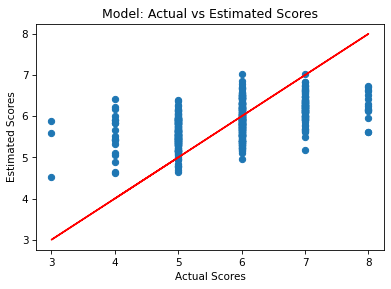

In [ ]:
X2_w_t = X_w_t2[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X2_w_t = sm.add_constant(X2_w_t) ## let's add an intercept (beta_0) to our model
Y2_w_t = model_w2.predict(X2_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t2, Y2_w_t)

plt.plot(Y_w_t2, Y_w_t2, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_w_t1, Y1_w_t, squared=False))

rmse 0.7609272381127572


In [ ]:
cutoff = 5.5
Y2_w_pred = np.zeros_like(Y2_w_t)    # initialise a matrix full with zeros
Y2_w_pred[Y2_w_t > cutoff] = 1

Y2_w_test = np.zeros_like(Y2_w_t)
Y2_w_test[Y_w_t2['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y2_w_test, Y2_w_pred)
w2_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(w2_cm)
# tp, tn, fp, fn

                  Predicted: Positive  Predicted: Negative
Actual: Positive                   75                  100
Actual: Negative                   33                  282


In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w2_cm.iloc[0]['Predicted: Positive']/(w2_cm.iloc[0]['Predicted: Positive']+w2_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w2_cm.iloc[1]['Predicted: Positive']/(w2_cm.iloc[1]['Predicted: Positive']+w2_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w2_cm.iloc[0]['Predicted: Negative']/(w2_cm.iloc[0]['Predicted: Positive']+w2_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w2 = precision_score(Y2_w_test, Y2_w_pred)
print('precision = ', p_w2 )# accuracy = % right estmation/ all estimation
a_w2 = accuracy_score(Y2_w_test, Y2_w_pred)
print('accuracy = ', a_w2)

TPR:  0.42857
FPR:  0.10476
FNR:  0.57143
precision =  0.7382198952879581
accuracy =  0.7285714285714285


## Repeat 3 ##

### Red Wine Data ###

In [ ]:
X_r_tr3, X_r_t3, Y_r_tr3, Y_r_t3 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 37)
X_r_tr3.to_csv('/content/sample_data/X_r_tr3.csv')
X_r_t3.to_csv('/content/sample_data/X_r_t3.csv')
Y_r_tr3.to_csv('/content/sample_data/Y_r_tr3.csv')
Y_r_t3.to_csv('/content/sample_data/Y_r_t3.csv')

In [ ]:

# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X3_r_selected = fs.fit_transform(X_r_tr3, Y_r_tr3)
print(X3_r_selected[:5])

[[7.60e-01 4.00e-02 5.40e+01 6.50e-01 9.80e+00]
 [4.10e-01 6.80e-01 6.90e+01 1.31e+00 9.30e+00]
 [4.80e-01 2.40e-01 3.20e+01 5.60e-01 1.00e+01]
 [5.90e-01 0.00e+00 4.40e+01 6.80e-01 1.08e+01]
 [4.20e-01 0.00e+00 8.80e+01 7.30e-01 1.36e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_r_tr3.head(5)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
2               7.8              0.76         0.04  ...  3.26       0.65      9.8
106             7.8              0.41         0.68  ...  3.08       1.31      9.3
534            10.0              0.48         0.24  ...  3.28       0.56     10.0
1171            7.1              0.59         0.00  ...  3.42       0.68     10.8
1228            5.1              0.42         0.00  ...  3.68       0.73     13.6

[5 rows x 11 columns]

In [ ]:
X3 = X_r_tr3[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3 = sm.add_constant(X3) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r3 = sm.OLS(Y_r_tr3, X3).fit()
predictions = model_r3.predict(X3) # make the predictions by the model

# Print out the statistics
model_r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     152.7
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          3.70e-130
Time:                        01:16:40   Log-Likelihood:                -1441.0
No. Observations:                1439   AIC:                             2894.
Df Residuals:                    1433   BIC:                             2926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8498      0.220     12.940      0.000       2.418       3.282
volatile acidity        -1.2235      0.121    -10.131      0.000      -1.460      -0.987
citric acid             -0.0188      0.112     -0.169      0.866      -0.238       0.200
total sulfur dioxide    -0.0027      0.001     -4.913      0.000      -0.004      -0.002
sulphates                0.7126      0.111      6.399      0.000       0.494       0.931
alcohol                  0.2972      0.017     17.437      0.000       0.264       0.331
==============================================================================
Omnibus:                       26.501   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.659
Skew:                          -0.170   Prob(JB):                     1.48e-09
Kurtosis:                       3.750   Cond. No.                         779.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X3 = X_r_tr3[['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3 = sm.add_constant(X3) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r3_2 = sm.OLS(Y_r_tr3, X3).fit()
predictions = model_r3_2.predict(X3) # make the predictions by the model

# Print out the statistics
model_r3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     191.0
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.55e-131
Time:                        01:16:40   Log-Likelihood:                -1441.1
No. Observations:                1439   AIC:                             2892.
Df Residuals:                    1434   BIC:                             2918.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8415      0.215     13.241      0.000       2.421       3.262
volatile acidity        -1.2130      0.103    -11.744      0.000      -1.416      -1.010
total sulfur dioxide    -0.0027      0.001     -4.933      0.000      -0.004      -0.002
sulphates                0.7086      0.109      6.513      0.000       0.495       0.922
alcohol                  0.2973      0.017     17.448      0.000       0.264       0.331
==============================================================================
Omnibus:                       26.679   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.897
Skew:                          -0.172   Prob(JB):                     1.32e-09
Kurtosis:                       3.751   Cond. No.                         746.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

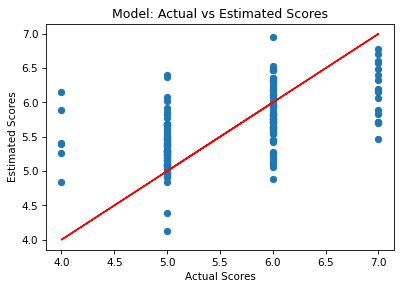

In [ ]:
X3_t = X_r_t3[['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3_t = sm.add_constant(X3_t) ## let's add an intercept (beta_0) to our model
Y3_t = model_r3_2.predict(X3_t)


plt.figure(dpi = 75)

plt.scatter(Y_r_t3, Y3_t)

plt.plot(Y_r_t3, Y_r_t3, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_r_t3, Y3_t, squared=False))

rmse 0.6124741182191162


In [ ]:
cutoff = 5.5
Y3_r_pred = np.zeros_like(Y3_t)    # initialise a matrix full with zeros
Y3_r_pred[Y3_t > cutoff] = 1

Y3_r_test = np.zeros_like(Y2_t)
Y3_r_test[Y_r_t3['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y3_r_test, Y3_r_pred)
r3_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(r3_cm)
# tp, tn, fp, fn

                  Predicted: Positive  Predicted: Negative
Actual: Positive                   55                   22
Actual: Negative                   14                   69


In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(r3_cm.iloc[0]['Predicted: Positive']/(r3_cm.iloc[0]['Predicted: Positive']+r3_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(r3_cm.iloc[1]['Predicted: Positive']/(r3_cm.iloc[1]['Predicted: Positive']+r3_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(r3_cm.iloc[0]['Predicted: Negative']/(r3_cm.iloc[0]['Predicted: Positive']+r3_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r3 = precision_score(Y3_r_test, Y3_r_pred)
print('precision = ', p_r3)
# accuracy = % right estmation/ all estimation
a_r3 = accuracy_score(Y3_r_test, Y3_r_pred)
print('accuracy = ', a_r3)

TPR:  0.71429
FPR:  0.16867
FNR:  0.28571
precision =  0.7582417582417582
accuracy =  0.775


### White Wine Data ###

In [ ]:
X_w_tr3, X_w_t3, Y_w_tr3, Y_w_t3 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 37)
X_w_tr3.to_csv('/content/sample_data/X_w_tr3.csv')
X_w_t3.to_csv('/content/sample_data/X_w_t3.csv')
Y_w_tr3.to_csv('/content/sample_data/Y_w_tr3.csv')
Y_w_t3.to_csv('/content/sample_data/Y_w_t3.csv')

In [ ]:
# define feature selection
fs_w = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X3_w_selected = fs_w.fit_transform(X_w_tr3, Y_w_tr3)
print(X3_w_selected[:5])

[[2.2000e-01 4.2000e-02 1.0500e+02 9.9300e-01 1.0500e+01]
 [3.2000e-01 3.3000e-02 1.2000e+02 9.9334e-01 1.0300e+01]
 [2.8000e-01 3.6000e-02 9.5000e+01 9.9440e-01 1.0200e+01]
 [3.1000e-01 5.2000e-02 1.1300e+02 9.9429e-01 8.4000e+00]
 [1.9000e-01 5.3000e-02 2.2900e+02 9.9860e-01 9.1000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_w_tr3.head(5)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
1639            7.9              0.22         0.49  ...  3.10       0.39     10.5
2675            7.2              0.32         0.24  ...  2.92       0.66     10.3
262             6.9              0.28         0.40  ...  3.17       0.33     10.2
3835            6.2              0.31         0.23  ...  3.16       0.48      8.4
2168            7.4              0.19         0.30  ...  3.14       0.49      9.1

[5 rows x 11 columns]

In [ ]:
X3_w = X_w_tr3[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X3_w = sm.add_constant(X3_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w3 = sm.OLS(Y_w_tr3, X3_w).fit()
predictions = model_w3.predict(X3_w) # make the predictions by the model

# Print out the statistics
model_w3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     296.6
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.65e-274
Time:                        01:16:40   Log-Likelihood:                -5109.4
No. Observations:                4408   AIC:                         1.023e+04
Df Residuals:                    4402   BIC:                         1.027e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -30.3468      6.627     -4.579      0.000     -43.339     -17.355
volatile acidity        -2.0820      0.118    -17.594      0.000      -2.314      -1.850
chlorides               -1.3533      0.573     -2.362      0.018      -2.476      -0.230
total sulfur dioxide     0.0009      0.000      2.919      0.004       0.000       0.002
alcohol                  0.3991      0.016     25.154      0.000       0.368       0.430
density                 32.7323      6.562      4.988      0.000      19.867      45.598
==============================================================================
Omnibus:                       81.408   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.173
Skew:                           0.015   Prob(JB):                     5.00e-37
Kurtosis:                       3.954   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X3_w = X_w_tr3[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'density']]
X3_w = sm.add_constant(X3_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w3_1 = sm.OLS(Y_w_tr3, X3_w).fit()
predictions = model_w3_1.predict(X3_w) # make the predictions by the model

# Print out the statistics
model_w3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     369.0
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.09e-274
Time:                        01:16:40   Log-Likelihood:                -5112.2
No. Observations:                4408   AIC:                         1.023e+04
Df Residuals:                    4403   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -31.5730      6.610     -4.777      0.000     -44.532     -18.614
volatile acidity        -2.1094      0.118    -17.903      0.000      -2.340      -1.878
alcohol                  0.4093      0.015     26.795      0.000       0.379       0.439
total sulfur dioxide     0.0009      0.000      2.786      0.005       0.000       0.002
density                 33.8096      6.550      5.162      0.000      20.969      46.650
==============================================================================
Omnibus:                       80.913   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.585
Skew:                           0.018   Prob(JB):                     1.11e-36
Kurtosis:                       3.949   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X3_w.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X3_w.values, i) 
                          for i in range(len(X3_w.columns))]
# print VIF
print(vif_data_w)

                feature            VIF
0                 const  323062.150185
1      volatile acidity       1.032009
2               alcohol       2.610047
3  total sulfur dioxide       1.408286
4               density       2.865339


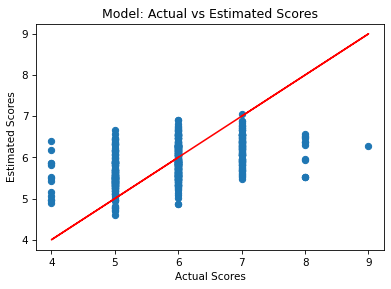

In [ ]:
X3_w_t = X_w_t3[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'density']]
X3_w_t = sm.add_constant(X3_w_t) ## let's add an intercept (beta_0) to our model
Y3_w_t = model_w3_1.predict(X3_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t3, Y3_w_t)

plt.plot(Y_w_t3, Y_w_t3, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_w_t3, Y3_w_t, squared=False))

rmse 0.7349929653431068


In [ ]:
cutoff = 5.5
Y3_w_pred = np.zeros_like(Y2_w_t)    # initialise a matrix full with zeros
Y3_w_pred[Y3_w_t > cutoff] = 1

Y3_w_test = np.zeros_like(Y3_w_t)
Y3_w_test[Y_w_t3['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y3_w_test, Y3_w_pred)
w3_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(w3_cm)
# tp, tn, fp, fn

                  Predicted: Positive  Predicted: Negative
Actual: Positive                   71                   86
Actual: Negative                   33                  300


In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w3_cm.iloc[0]['Predicted: Positive']/(w3_cm.iloc[0]['Predicted: Positive']+w3_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w3_cm.iloc[1]['Predicted: Positive']/(w3_cm.iloc[1]['Predicted: Positive']+w3_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w3_cm.iloc[0]['Predicted: Negative']/(w3_cm.iloc[0]['Predicted: Positive']+w3_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w3 = precision_score(Y3_w_test, Y3_w_pred)
print('precision = ', p_w3)# accuracy = % right estmation/ all estimation
a_w3 = accuracy_score(Y3_w_test, Y3_w_pred)
print('accuracy = ', a_w3)

TPR:  0.45223
FPR:  0.0991
FNR:  0.54777
precision =  0.7772020725388601
accuracy =  0.7571428571428571


## Summarize ##

In [ ]:
# create empty dataframe to fill the mean confusion matrix for red wine data
sum_cm_r = pd.DataFrame(index = ['Actual: Positive', 'Actual: Negative'], columns = ['Predicted: Positive', 'Predicted: Negative'])
for ind in sum_cm_r.columns:
  sum_cm_r[ind][0] = r1_cm[ind][0] + r2_cm[ind][0] + r3_cm[ind][0]
  sum_cm_r[ind][1] = r1_cm[ind][1] + r2_cm[ind][1] + r3_cm[ind][1]
print(sum_cm_r)


                 Predicted: Positive Predicted: Negative
Actual: Positive                 163                  65
Actual: Negative                  55                 197


In [ ]:

# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(sum_cm_r.iloc[0]['Predicted: Positive']/(sum_cm_r.iloc[0]['Predicted: Positive']+sum_cm_r.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(sum_cm_r.iloc[1]['Predicted: Positive']/(sum_cm_r.iloc[1]['Predicted: Positive']+sum_cm_r.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(sum_cm_r.iloc[0]['Predicted: Negative']/(sum_cm_r.iloc[0]['Predicted: Positive']+sum_cm_r.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r = st.mean([p_r1, p_r2, p_r3])
print('precision = ', p_r )# accuracy = % right estmation/ all estimation
a_r = st.mean([a_r1, a_r2, a_r3])
print('accuracy = ', a_r)

TPR:  0.71491
FPR:  0.21825
FNR:  0.28509
precision =  0.7521999073723211
accuracy =  0.75


In [ ]:
# create empty dataframe to fill the mean confusion matrix for red wine data
sum_cm_w = pd.DataFrame(index = ['Actual: Positive', 'Actual: Negative'], columns = ['Predicted: Positive', 'Predicted: Negative'])
for ind in sum_cm_w.columns:
  sum_cm_w[ind][0] = w1_cm[ind][0] + w2_cm[ind][0] + w3_cm[ind][0]
  sum_cm_w[ind][1] = w1_cm[ind][1] + w2_cm[ind][1] + w3_cm[ind][1]
print(sum_cm_w)

                 Predicted: Positive Predicted: Negative
Actual: Positive                 216                 281
Actual: Negative                  99                 874


In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(sum_cm_w.iloc[0]['Predicted: Positive']/(sum_cm_w.iloc[0]['Predicted: Positive']+sum_cm_w.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(sum_cm_w.iloc[1]['Predicted: Positive']/(sum_cm_w.iloc[1]['Predicted: Positive']+sum_cm_w.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(sum_cm_w.iloc[0]['Predicted: Negative']/(sum_cm_w.iloc[0]['Predicted: Positive']+sum_cm_w.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w = st.mean([p_w1, p_w2, p_w3])
print('precision = ', p_w )# accuracy = % right estmation/ all estimation
a_w = st.mean([a_w1, a_w2, a_w3])
print('accuracy = ', a_w)

TPR:  0.43461
FPR:  0.10175
FNR:  0.56539
precision =  0.7566479772170358
accuracy =  0.7414965986394557


# **CONCLUSION**

+ K means clustering method:
  - In red wine data with k = 2,3 the data is divided quite perfectly while in white data with k = 2,3 the data is separated poorly
  - The accuracy rate is ranging from 55% to 63%
+ Linear regression method:
  - The method work well for both red and white dataset
  - The accuracy rate is above 74% and precision is 75.6%
+ Conlusion:
  - If we seek to understand this dataset, then:
  - In this circumstance and dataset, we should use linear regression instead of k means clustering because of better performance rate and we see that some predictors are highly correlated with the quality variable
  - The k mean clustering method in this situation only work well for small number of feature data. We should take full advantage of k mean's applications in other problems. Image Segmentation is a typical example.